In [156]:
import colorgrad
from skimage import io
from matplotlib import pyplot as plt
from skimage.color import rgb2hsv, rgb2lab, rgb2luv, hsv2rgb, lab2rgb
import numpy as np
import scipy.ndimage as spi
from scipy.signal import convolve2d

In [157]:
img1 = io.imread('pic1.png')
img2 = io.imread('pic2.png')

In [158]:
img1_to_hsv = rgb2hsv(img1)
img1_to_luv = rgb2lab(img1)
img1_to_lab = rgb2luv(img1)

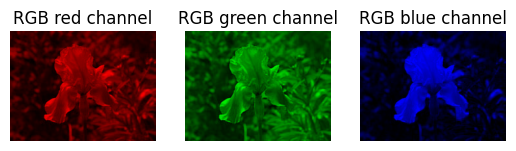

In [159]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3)

color_channels = {}

for index, color in enumerate(('red', 'green', 'blue')):
    color_channels[color] = np.copy(img1)
    color_channels[color][:, :, (index + 1) % 3] = 0
    color_channels[color][:, :, (index + 2) % 3] = 0

for axe, color in zip(fig.get_axes(), ('red', 'green', 'blue')):
    axe.imshow(color_channels[color])
    axe.axis('off')
    axe.set_title('RGB ' + color + ' channel')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


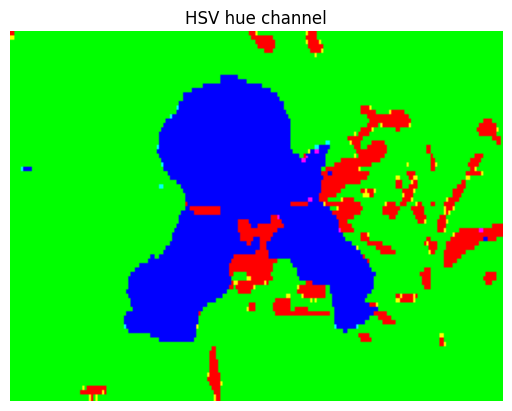

In [160]:
hue = np.copy(img1_to_hsv)
hue[:, :, 1] = 255
hue[:, :, 2] = 255
pic = hsv2rgb(hue)

fig = plt.figure()

plt.title('HSV hue channel')
plt.axis('off')
plt.imshow(pic)

plt.show()

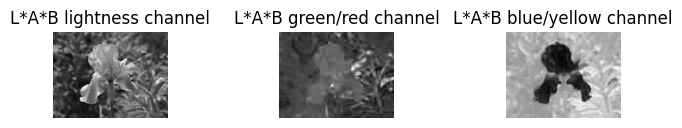

In [161]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3)

fig.tight_layout(w_pad=5)

ax0.set_title('L*A*B lightness channel')
ax1.set_title('L*A*B green/red channel')
ax2.set_title('L*A*B blue/yellow channel')

for index, axe in enumerate(fig.get_axes()):
    axe.axis('off')
    axe.imshow(img1_to_lab[:, :, index], cmap='gray')

plt.show()

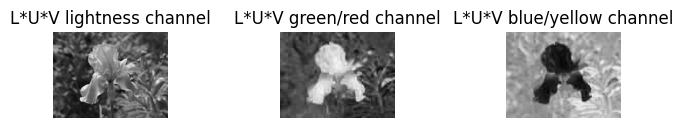

In [162]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3)

fig.tight_layout(w_pad=5)

ax0.set_title('L*U*V lightness channel')
ax1.set_title('L*U*V green/red channel')
ax2.set_title('L*U*V blue/yellow channel')

for index, axe in enumerate(fig.get_axes()):
    axe.axis('off')
    axe.imshow(img1_to_luv[:, :, index], cmap='gray')

plt.show()


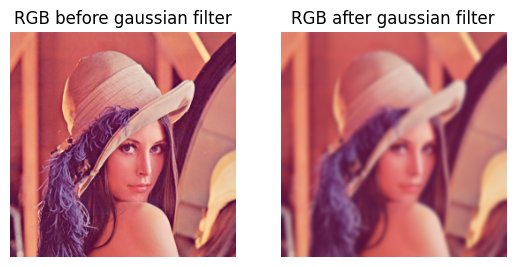

In [163]:
img2 = io.imread('pic2.png')
img2_smoothed_rgb = np.copy(img2)


for i in range(3):
    img2_smoothed_rgb[:, :, i] = spi.gaussian_filter(img2_smoothed_rgb[:, :, i], sigma = 2)

f, (ax1, ax2) = plt.subplots(1,2)

for axs in f.get_axes():
    axs.axis('off')

ax1.set_title('RGB before gaussian filter')
ax2.set_title('RGB after gaussian filter')

ax1.imshow(img2)
ax2.imshow(img2_smoothed_rgb)

plt.show()

In [164]:
img2_to_hsv = rgb2hsv(img2)
img2_to_lab = rgb2lab(img2)

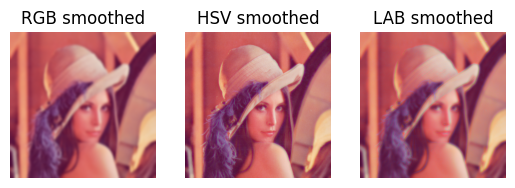

In [165]:
img2_to_hsv_smoothed = np.copy(img2_to_hsv)
img2_to_lab_smoothed = np.copy(img2_to_lab)

img2_to_hsv_smoothed[:, :, 2] = spi.gaussian_filter(img2_to_hsv[:, :, 2], sigma=2)
img2_to_hsv_smoothed = hsv2rgb(img2_to_hsv_smoothed)
img2_to_lab_smoothed[:, :, 0] = spi.gaussian_filter(img2_to_lab[:, :, 0], sigma=2)
img2_to_lab_smoothed = lab2rgb(img2_to_lab_smoothed)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

for axs in fig.get_axes():
    axs.axis('off')

ax1.set_title('RGB smoothed')
ax2.set_title('HSV smoothed')
ax3.set_title('LAB smoothed')

ax1.imshow(img2_smoothed_rgb)
ax2.imshow(img2_to_hsv_smoothed)
ax3.imshow(img2_to_lab_smoothed)

plt.show()

In [166]:
img2_sharpned_rgb = np.copy(img2)
img2_to_hsv_sharpned = np.copy(img2_to_hsv)
img2_to_lab_sharpned = np.copy(img2_to_lab)

c:\Users\droni\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: Color data out of range: Z < 0 in 290 pixels
  return func(*args, **kwargs)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


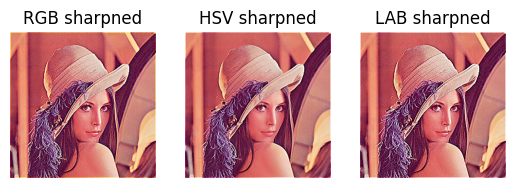

In [167]:
def laplace(img_arr, type):
    filter = np.array([
    [0, 1 ,0],
    [1, -4, 1],
    [0, 1, 0]
    ])
    
    laplas = convolve2d(img_arr,filter)[1:-1, 1:-1]
    if type=='RGB':
        res = np.clip(img_arr - laplas, 0, 255).astype(np.uint8)
    else:
        res = img_arr - laplas

    return res

for i in range(i):
    img2_sharpned_rgb[:, :, i] = laplace(img2_sharpned_rgb[:, :, i], 'RGB')

img2_to_hsv_sharpned[:, :, 2] = laplace(img2_to_hsv_sharpned[:, :, 2], 'HSV')
img2_to_hsv_sharpned = hsv2rgb(img2_to_hsv_sharpned)

img2_to_lab_sharpned[:, :, 0] = laplace(img2_to_lab_sharpned[:, :, 0], 'LAB')
img2_to_lab_sharpned = lab2rgb(img2_to_lab_sharpned)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

for axs in fig.get_axes():
    axs.axis('off')

ax1.set_title('RGB sharpned')
ax2.set_title('HSV sharpned')
ax3.set_title('LAB sharpned')

ax1.imshow(img2_sharpned_rgb)
ax2.imshow(img2_to_hsv_sharpned)
ax3.imshow(img2_to_lab_sharpned)

plt.show()

In [168]:
img2_for_equalization = np.copy(img2)

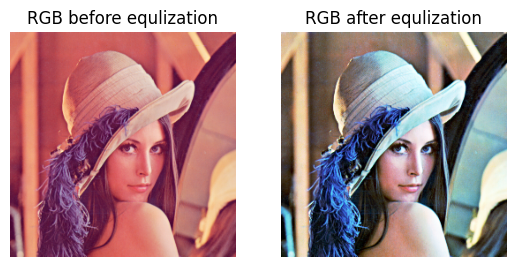

In [169]:
def equalization(img, type):
    
    channels = ()
    
    if type == 'RGB':
        channels = 0, 1, 2
    if type == 'HSV':
        channels = 2,
    if type == 'LAB':
        channels = 0,
    
    his_array = [None] * 3

    for i in channels:
        
        if type != 'RGB':
            img[:, :, i] = img[:, :, i] * 100

        flatten_channel = (img[:, :, i].flatten()).astype(np.uint8)
        his_array[i] = np.bincount(flatten_channel, minlength=256)

        pixels_count = np.sum(his_array[i])
        table = np.cumsum(his_array[i]) / pixels_count
        
        if type=='RGB':
            img[:, :, i] = (table[ img[:, :, i] ] * 255).astype(np.uint8)
        
        else:
            
            img[:, :, i] = table[(img[:, :, i]).astype(np.uint8)]
            img[:, :, i] /= 100
    return img

rgb_equalized = equalization(np.copy(img2), 'RGB')

fig, (ax1, ax2) = plt.subplots(1, 2)

for axs in fig.get_axes():
    axs.axis('off')

ax1.axis('off')

ax1.set_title('RGB before equlization')
ax2.set_title('RGB after equlization')

ax1.imshow(img2)
ax2.imshow(rgb_equalized)

plt.show()

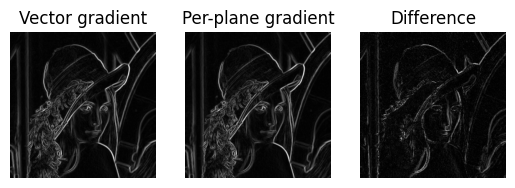

In [177]:
contour_img2 = np.copy(img2)

fig.tight_layout(w_pad=5)

grads = colorgrad.colorgrad(contour_img2, 1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

for axs in fig.get_axes():
    axs.axis('off')

ax1.axis('off')

ax1.set_title('Vector gradient')
ax2.set_title('Per-plane gradient')
ax3.set_title('Difference')

ax1.imshow(grads[0], cmap='gray')
ax2.imshow(grads[-1], cmap='gray')
ax3.imshow(np.abs(grads[0] - grads[-1]), cmap='gray')

plt.show()